<a href="https://colab.research.google.com/github/paulo-lins/EDA_datasus/blob/main/EDA_tabnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Through **DATASUS** (site: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) we will access Hospital Production data, by region and federation unit, since 2008 and we will analyze the total amount spent on health by the federal government. We will search for this data through **TABNET**, a portal available on the website above. In our dataframe we will use the year and month of processing, which is when the values ​​are processed and passed on to the manager or hospital institution.

This notebook contains the exploratory analysis of data from "Datasus" from the year 2008 to the last year of processing available on the website above.

In [1]:
import pandas as pd

In [2]:
# IIn Brazil sometimes we will have to use encoding='ISO-8859-1' for Latin characters

url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'

# df1 = pd.read_csv(url, encoding='ISO-8859-1') *

# this returns us ------> ParserError                               
# Traceback (most recent call last)
# <ipython-input-3-de3887ba5c9c> in <module>()
#      3 url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'
#      4 
#----> 5 df1 = pd.read_csv(url, encoding='ISO-8859-1')


#ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174

In [3]:
# Atention, (ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174), 
# this error is related to some problem reading the data. As header and what kind of separator... in this case it's set to ',' but when we open the file we observe that it is separated by ';'

In [4]:
tabnet_data = pd.read_csv(url, 
                  encoding='ISO-8859-1',
                  skiprows=3,     #skip unnecessary lines
                  skipfooter=12,  #skip unnecessary footer
                  sep=';',        #set the separator
                  thousands='.',   #set the thousand to '.'
                  decimal=',')    #set the decimal to ','
tabnet_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13054440.15,12112418.95,9765323.52,11091614.20,11206618.94,11050292.93,12371950.02,11554081.53,9895887.03,1.168339e+09
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,3584824.97,-,4.999633e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22720450.82,21120609.03,16901290.05,18371952.43,17783646.65,15403023.75,17984992.03,19409055.43,17572660.38,2.189227e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,3328597.91,3266805.71,3.746009e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45126860.59,45771568.39,45038864.11,44566789.75,44358065.42,44802364.31,44554060.25,42076801.20,43170314.35,5.311265e+09


In [5]:
#show the last 5 lines
tabnet_data.tail() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,1.375493e+08,1.229436e+08,1.147044e+08,1.151691e+08,1.143993e+08,1.027617e+08,1.059412e+08,1.082238e+08,103246325.57,1.439021e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,3.671334e+07,3.314037e+07,2.399633e+07,2.434326e+07,2.200306e+07,2.202217e+07,2.404754e+07,2.447686e+07,20695521.11,2.680512e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,3.896208e+07,2.928720e+07,2.791062e+07,2.156352e+07,2.031116e+07,2.069234e+07,2.233834e+07,2.001901e+07,16076544.64,2.539254e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,7.246173e+07,6.729214e+07,5.838279e+07,4.346182e+07,4.473026e+07,4.541720e+07,4.130926e+07,4.060964e+07,38726340.65,5.702548e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,2.728877e+07,2.850999e+07,2.620743e+07,2.514746e+07,2.274292e+07,2.494576e+07,2.440409e+07,2.603333e+07,25430770.37,2.953368e+09


In [6]:
# let's calculate the average cost per month in each state. For this we are going to use the mean function.
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2021/Dez    5.814510e+07
2022/Jan    5.788532e+07
2022/Fev    5.802283e+07
2022/Mar    5.754811e+07
Total       7.268224e+09
Length: 171, dtype: float64

In [7]:
# It is a little difficult to understand the numbers above. For this, we will use pd.options.float = "{:.2f}".format
pd.options.display.float_format = "{:.2f}".format
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Dez     58145101.08
2022/Jan     57885315.71
2022/Fev     58022827.57
2022/Mar     57548111.74
Total      7268224369.78
Length: 171, dtype: float64

In [8]:
# When we access the data like showed bellow, python return a series
tabnet_data["2008/Ago"]


0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [9]:
# A series also has a mean function
tabnet_data["2008/Ago"].mean()

27800320.306666665

**Now, we will make a graphic for this month and year (August, 2008) for each state**

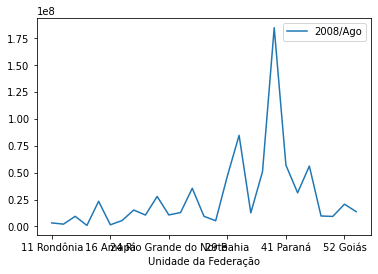

In [10]:
# we can see that using lines in this case is not the best
# choice to understand what we want to show
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago")

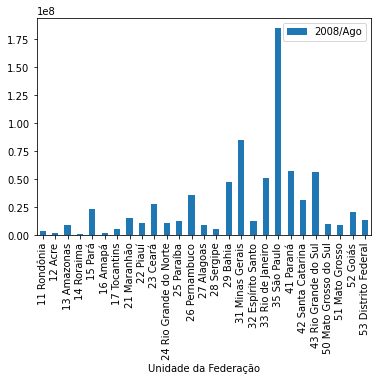

In [11]:
# We can do better using the parameter kind='bar'. 
# It will show a vertical bar plot.
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar')

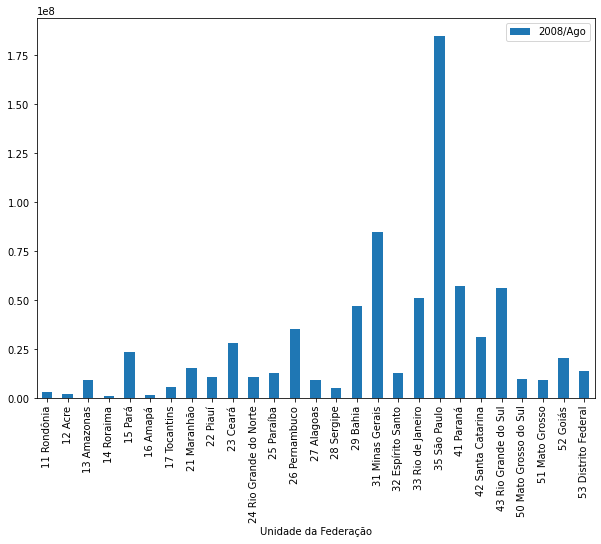

In [12]:
# We can change the size using the parameter figsize
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7))

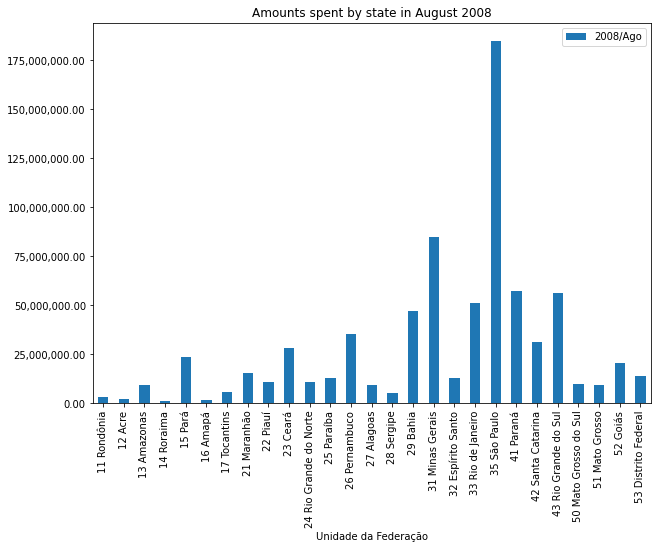

In [13]:
# For improve our graphic, we use the matplotlib. 
# Python Matplotlib is a library of the Python,
# used for data visualization and graphic plotting. 
# With matplotlib we can do more things like to format a values on y axis

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ax is the abbreviation for axis
ax = tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7)) 

# Here, we're formatting for thousands with ',' and decimals with '.'
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

# using ';' at the end is the same that using plt.show()
plt.title("Amounts spent by state in August 2008"); 




Now we will do the same analysis for the most recent month and year

Text(0.5, 1.0, '"Amounts spent by state in March, 2022"')

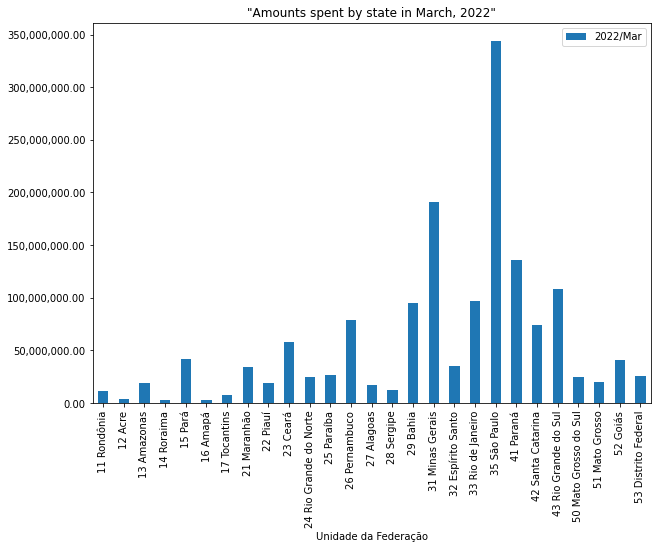

In [14]:
# the most recent month and year with all informations in our dataframe is 2022/Mar

ax = tabnet_data.plot(x='Unidade da Federação', y="2022/Mar", kind="bar", figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('"Amounts spent by state in March, 2022"')

In [15]:
url_1 = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A112952189_28_143_208.csv'

data_tabnet_1 = pd.read_csv(url_1, 
                            encoding='ISO-8859-1', 
                            skiprows=3, sep=';', 
                            skipfooter=11,
                            decimal=',',
                            thousands='.')
data_tabnet_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,2211331.68,1168339075.47
1,12 Acre,-,-,-,-,-,-,-,-,-,...,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,-,499963323.36
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,3331913.37,2189227062.50
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,1430992.15,374600917.06
4,15 Pará,-,-,-,-,-,-,-,-,-,...,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,14014246.92,5311264998.18


In [16]:
# let´s take a look at two dates, 2008/Ago and 2008/Set
# Note: for this we will need to use this syntax:
# tabnet_data[["2008/Aug", "2008/Sep"]] so we slice our dataframe into just two dates

data_tabnet_1[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [17]:
# Now let's get only dates that have all values ​​entered
# We will use tabnet_data.mean(). 
# This function will only return dates with all values ​​filled

data_tabnet_1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


2007/Ago        588123.21
2007/Set       1519994.43
2007/Out       4706028.57
2007/Nov      10640611.38
2007/Dez      23793093.17
                ...      
2021/Dez     103725482.47
2022/Jan     111765147.15
2022/Fev      88409821.37
2022/Mar      74376939.27
Total      14017275688.16
Length: 177, dtype: float64

In [18]:
# Let´s see the index...
data_tabnet_1.mean().index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez',
       '2022/Jan', '2022/Fev', '2022/Mar', 'Total'],
      dtype='object', length=177)

In [19]:
# Let's name this index as 'usable_columns'
usable_columns = data_tabnet_1.mean().index
usable_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez',
       '2022/Jan', '2022/Fev', '2022/Mar', 'Total'],
      dtype='object', length=177)

In [20]:
# Now we get the columns in our dataframe that have all the values
# note: there many ways to take only the columns where all values are present. 
 
data_tabnet_1[usable_columns].head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [21]:
# Note: The index is an immutable series, to change the index we will transform it into a python list. We will do this to insert the value 'state'
usable_columns = data_tabnet_1.mean().index.tolist() # Now we have a python list and can make some changes like insert 'Unidade da Federação' (Unidade da Federação is another way to call states here in Brazil)
usable_columns.insert(0, 'Unidade da Federação')
data_tabnet_1[usable_columns].head() # So we will only see months with all present values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [22]:
# There is no reason for this numerical index. 
# So we can change it using set_index('Unidade da Federação'). 
# In this way, the states (Unidade da Federação) will be the new index.

usable = data_tabnet_1[usable_columns] 
usable.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [23]:
# set_index return a new value so we need reassign

usable = usable.set_index('Unidade da Federação')
usable

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,4838664.55,3270848.94,2591304.85,2609596.55,2503056.50,2830533.47,2990370.73,1934134.55,950756.63,355296258.11
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,12621978.71,10974163.56,9254941.56,7603258.11,8253100.30,7311310.22,4987769.55,2760366.02,1484737.42,1176986939.63
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,45054211.12,42829805.40,36494568.05,37330067.47,34725553.20,34922133.30,37032102.16,27857199.57,22502888.05,4421777377.42
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24120586.23,21162393.74,20810195.34,21790026.52,21401883.31,20248019.39,20960349.50,16379766.75,15572014.94,2599796687.65


In [24]:
# If we want to do a search by index, we can use, for example: usable.loc["29 Bahia"]. That way python will return every line where the index is "29 Bahia"

usable.loc["29 Bahia"]

2007/Ago        135146.36
2007/Set        448349.75
2007/Out       1382038.11
2007/Nov       3348779.62
2007/Dez      11948984.56
                ...      
2021/Dez      86728884.38
2022/Jan      88578418.29
2022/Fev      62111090.85
2022/Mar      37460272.11
Total      11084271493.92
Name: 29 Bahia, Length: 177, dtype: float64

In [25]:
# Let´s Transpose our dataframe

usable.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal,Total
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47,8233724.90
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25,21279921.98
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56,65884400.02
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48,148968559.33
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42,333103304.40


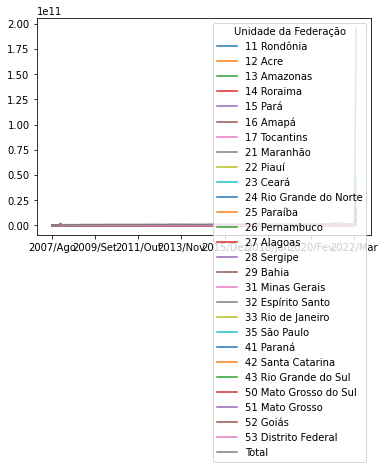

In [26]:
# Now we can see what a simple graph shows us
usable.T.plot()

In [27]:
# At the end of the graph we can see higher values. This is because at the end of the dataframe is the total (the sum of the values)
# Let´s drop this
usable = usable.T.drop('Total', axis=1) # here we need to specify the axis 0 for row and 1 for columns
usable

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Dez,12140433.71,3147253.20,17961837.53,3030814.46,45022040.26,2830533.47,7311310.22,34922133.30,20248019.39,56575408.59,...,36774955.39,90159560.94,317195469.00,119099508.17,69871502.62,97845923.37,20317345.77,18873661.66,37494674.38,21925610.09
2022/Jan,12246678.75,2928912.88,19184516.06,3290733.13,43586015.85,2990370.73,4987769.55,37032102.16,20960349.50,56421030.88,...,38857687.15,102949984.15,350031956.62,122074884.89,72803631.18,106760162.92,20055196.44,23561867.36,41692565.65,26098225.45
2022/Fev,9555423.05,2009443.49,13643435.66,2725609.84,37961439.28,1934134.55,2760366.02,27857199.57,16379766.75,43943242.39,...,30365307.46,80256046.71,282140976.72,99076263.45,57407790.43,86604368.62,13966555.07,17415111.10,32626695.40,22084467.38
2022/Mar,5807201.82,1001816.10,11391120.81,2938287.54,33357407.81,950756.63,1484737.42,22502888.05,15572014.94,37524617.47,...,27490593.88,68765991.31,263637373.33,88685215.80,43741602.56,70309355.99,10183082.09,12807140.51,30251644.15,20169133.10


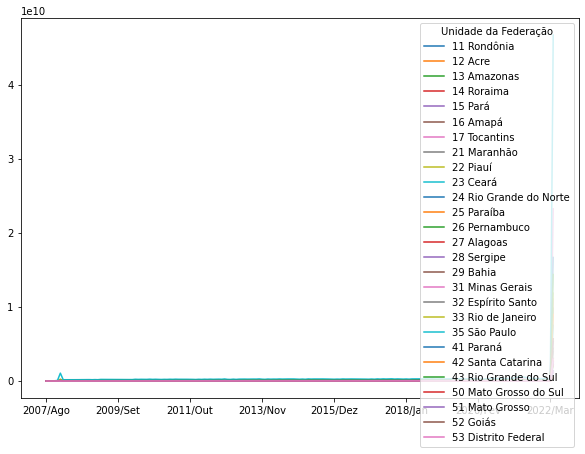

In [28]:
# We can see the difference in the graph (without the 'total' column)

usable.plot(figsize=(10, 7))


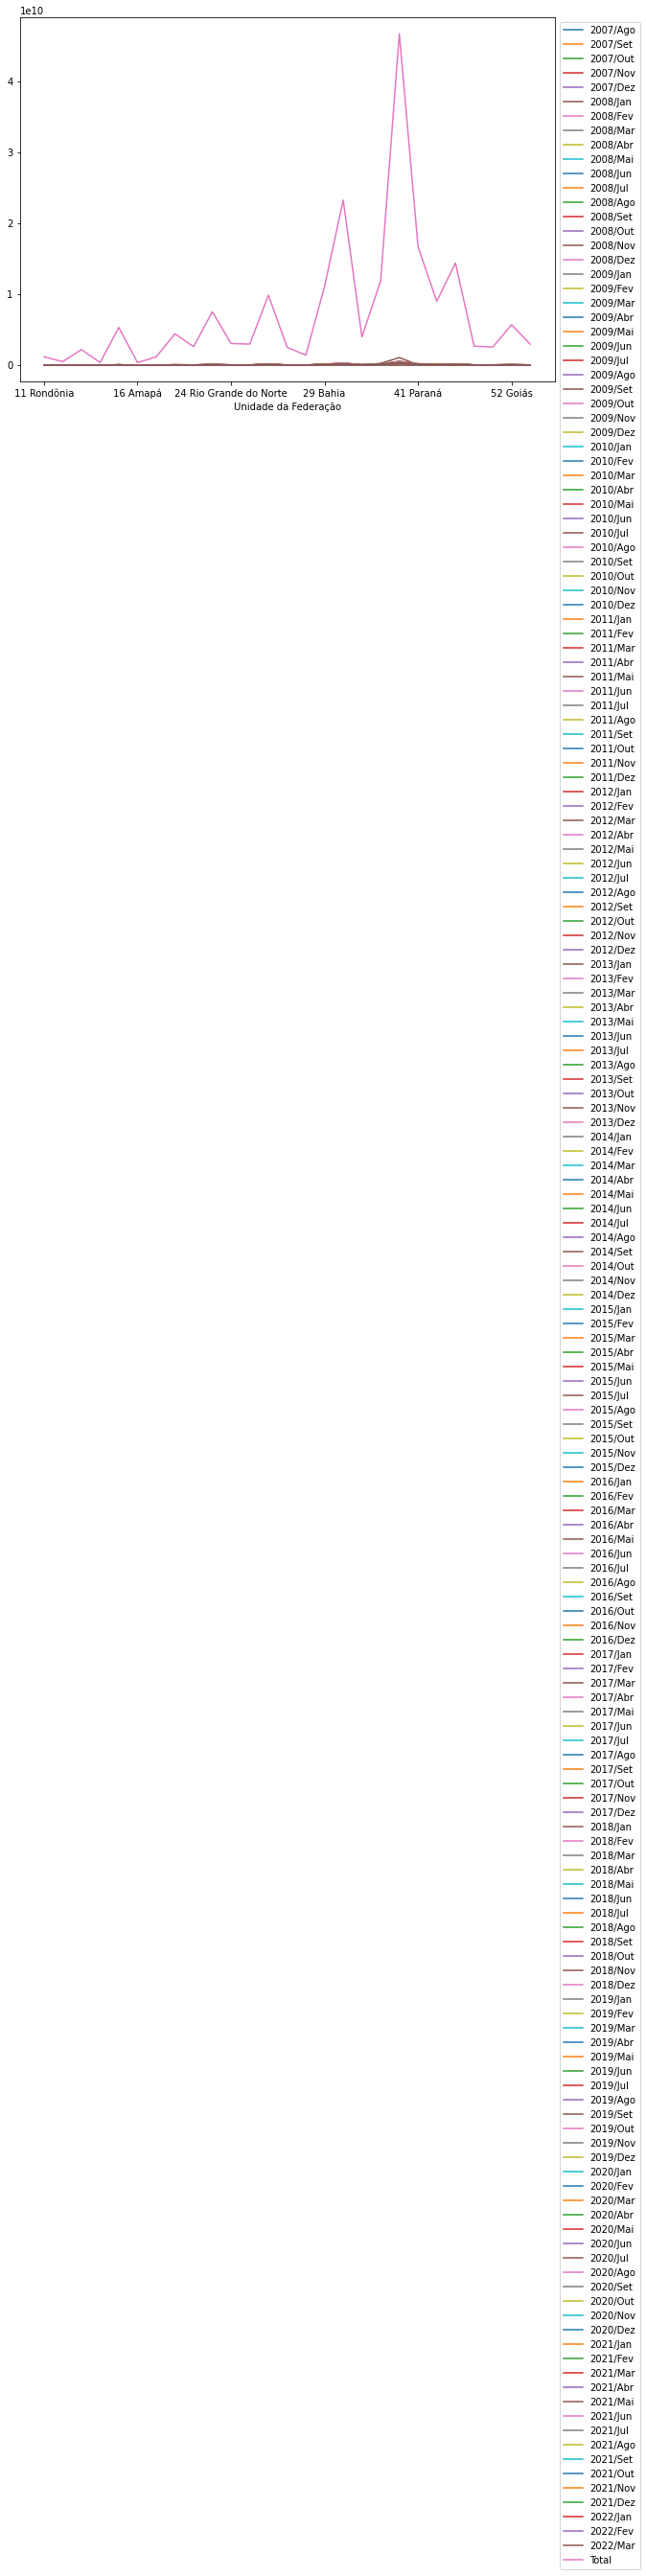

In [29]:
# Now, we can use the bbox_to_anchor keyword argument to place the legend outside the axes 
usable.T.plot(figsize=(10, 7))
plt.legend(bbox_to_anchor=(1, 0.5, 0, 0.5))


In [30]:
# Let's look at the states, if we use "usable.T.columns", they are now the columns.

usable.T.columns

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez',
       '2022/Jan', '2022/Fev', '2022/Mar', 'Total'],
      dtype='object', length=177)

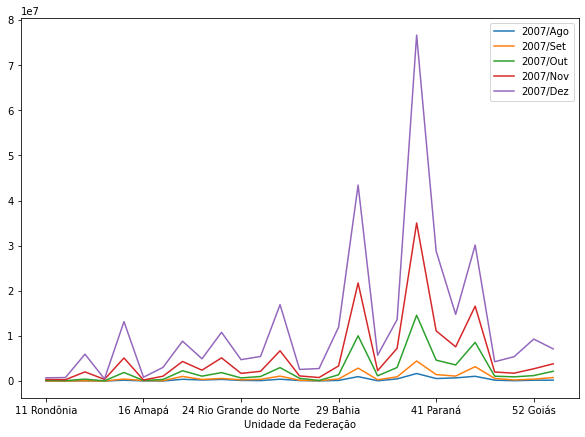

In [31]:
# Our graph will be better understood with fewer states. Let's pick five.
# Now we can see better the lines and values for each state 
usable[:5].T.plot(figsize=(10, 7)) # note: we´re using T (transpose)

In [32]:
# We can choose an 'n' number of random states using the sample(n=5) parameter. In this case for 5 random states
usable.sample(n=5)

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2014/Out,7096778.40,3079894.04,11780494.51,1792376.75,28900904.08,2002560.03,8198652.90,26207062.17,14293771.07,43552544.65,...,22522368.57,64108659.85,277477850.12,94904373.35,53963254.37,93416548.53,15480496.35,14958564.62,35382520.84,13765945.14
2013/Fev,4378412.90,2650391.04,9429474.72,1483195.30,24858606.41,1816966.55,6867397.84,21445241.15,12275407.40,35710935.71,...,17941358.17,51297452.01,222705277.69,73976801.67,40454271.52,66867562.81,12661202.29,11344659.97,27694012.30,14463584.48
2016/Jun,8355165.66,3380644.97,13143225.36,2390060.15,30920858.90,2075852.44,6685793.03,26541084.89,16255227.09,47592767.97,...,24891774.42,64809173.17,278238064.64,107370488.61,61490742.54,91310016.17,16882187.60,15586368.03,35596287.69,17529009.97
2016/Fev,6760305.81,3037922.80,11990242.08,2000924.90,27179920.78,1634178.49,6135319.66,24770109.12,14211959.72,41106872.30,...,22336137.30,60140455.45,250027826.34,91925876.55,50990761.76,79211931.13,15089363.65,14414918.94,32782328.92,15629798.61
2016/Out,7963674.01,2911080.18,12121775.20,2349084.57,30090090.28,1766504.15,6095598.53,25372367.35,15292962.10,43521704.45,...,24716633.41,64207534.85,266465601.11,105530148.67,56509278.64,87089975.07,15450100.36,15111332.72,32763286.81,17420879.75


In [33]:
# for that, let's sum all the values ​​of each state. That is, all the values ​​of each row

usable.sum(axis=1)

2007/Ago        8233724.90
2007/Set       21279921.98
2007/Out       65884400.02
2007/Nov      148968559.33
2007/Dez      333103304.40
                 ...      
2021/Dez     1452156754.61
2022/Jan     1564712060.15
2022/Fev     1237737499.20
2022/Mar     1041277149.78
Total      196241859634.28
Length: 177, dtype: float64

In [34]:
# now we will create the 'Total'. The same column we already drop.
# usable['Total'] = usable.T.sum()
# usable.T.tail()

usable.T.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [35]:
# In the chart below we will take the five states with the highest health costs
# First we will sort values using 'Total' column
# so let's reassign our dataframe to 'sort_total'

sort_total = usable.T.sort_values(by='Total', ascending=False)



In [36]:
# Then again we will drop the 'Total' row
sort_total = sort_total.drop('Total', axis=1)
# sort_total = sort_total.head() # now, we can see the 5 states with the highest healthcare costs

sort_total_all_states = sort_total
sort_total_all_states

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1062876666.11,173178487.49,170692267.36,170449727.03,172573621.67,...,520280167.19,448012733.49,391602214.93,348446858.66,333549250.99,319492072.08,317195469.00,350031956.62,282140976.72,263637373.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206687824.13,70301089.50,79119005.51,79046322.41,79268070.12,...,269136076.22,246357902.93,217052928.90,190903797.35,181571440.96,176449282.25,174231062.82,197349767.67,154029566.86,115965696.13
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,187763085.02,165485891.40,173023862.07,152412360.39,139634819.66,126148309.82,119099508.17,122074884.89,99076263.45,88685215.80
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,152818315.61,133175644.79,116646364.28,113620892.84,115169723.59,109993295.97,97845923.37,106760162.92,86604368.62,70309355.99
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,252841126.65,44128159.73,42916090.85,45324789.60,43951349.46,...,131270702.39,134724592.08,141551048.26,119585134.99,100460921.96,93154094.81,90159560.94,102949984.15,80256046.71,68765991.31
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,74951730.04,33410124.06,41342640.25,42826993.62,42112043.58,...,124784443.17,110978026.78,97126115.51,87438191.00,89199342.02,87960897.77,86728884.38,88578418.29,62111090.85,37460272.11
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,121551377.50,96035363.48,86690358.45,83342437.47,84092779.78,83842186.80,84871437.71,95328934.39,77148801.20,68771886.81
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,109983652.63,98407595.24,91006910.15,82412361.41,82646789.49,76476595.28,69871502.62,72803631.18,57407790.43,43741602.56
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,85946192.31,69305156.47,59193659.98,56552545.10,56580341.10,56263417.71,56575408.59,56421030.88,43943242.39,37524617.47


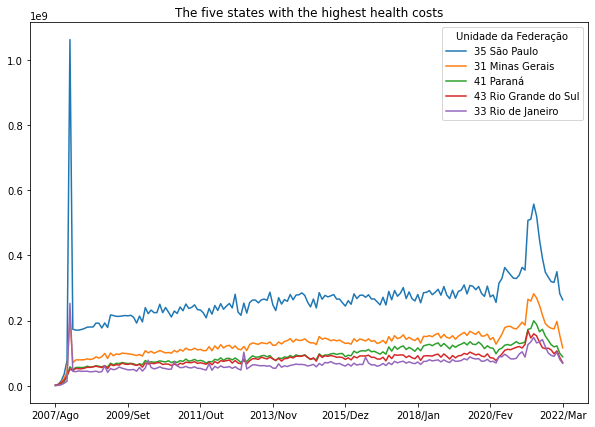

In [37]:
# now, we will plot the five states with the highest health costs
# for now we will use 'sort_total.head(5)'

sort_total.head(5).T.plot(figsize=(10,7))
plt.title('The five states with the highest health costs');

In [38]:
# now let's choose another state to compare with these five on the chart
# Let´s take my state: '23 Ceará'
ceara = sort_total.T['23 Ceará']

ceara

2007/Ago     357904.65
2007/Set     572356.18
2007/Out    1865065.71
2007/Nov    5131814.39
2007/Dez   10798042.86
               ...    
2021/Nov   56263417.71
2021/Dez   56575408.59
2022/Jan   56421030.88
2022/Fev   43943242.39
2022/Mar   37524617.47
Name: 23 Ceará, Length: 176, dtype: float64

In [39]:
# Now let's insert the '23 Ceará' in a 'filter' dataframe
state_to_add = ceara
filter = sort_total.T
filter.insert(5, 'Ceará', state_to_add)

filter = filter.T.head(6)

Text(0.5, 1.0, 'The states with the highest health expenditures compared with Ceará')

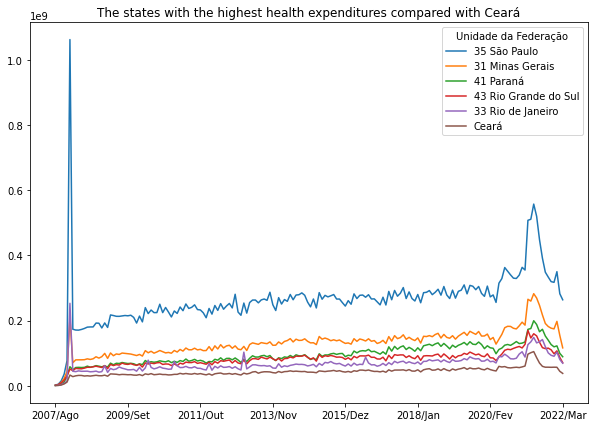

In [40]:
# Now, let's plot again with the "new" state to compare with the states with the highest healthcare costs

filter.T.plot(figsize=(10, 7))
plt.title('The states with the highest health expenditures compared with Ceará')

In [41]:
# note: at the beginning of the graph we have a spike in the São Paulo line and this can make the graph more difficult to read
# Let's fix this. In 2008/Jan we have a cost of 10 billion for São Paulo alone. Maybe this could be correct, 
# but to improve our understanding of the chart, let's use dates after 2008/Jan onwards
# let´s see our columns

sort_total.columns


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov',
       '2021/Dez', '2022/Jan', '2022/Fev', '2022/Mar'],
      dtype='object', length=176)

In [42]:
# now we can start from sixth column and get dates after '2008/jan'
# we can call that like 'usable_columns'

usable_columns = sort_total.columns[6:]
usable_columns


Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov',
       '2021/Dez', '2022/Jan', '2022/Fev', '2022/Mar'],
      dtype='object', length=170)

In [43]:
# this way we can select only the dates after '2008/jan'
sort_total = sort_total[usable_columns]
sort_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,173178487.49,170692267.36,170449727.03,172573621.67,175632450.60,179653582.91,180204375.96,180281060.51,192160807.16,191620087.99,...,520280167.19,448012733.49,391602214.93,348446858.66,333549250.99,319492072.08,317195469.00,350031956.62,282140976.72,263637373.33
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79632111.54,82225138.22,80374117.08,82425865.58,88613476.60,84486996.11,...,269136076.22,246357902.93,217052928.90,190903797.35,181571440.96,176449282.25,174231062.82,197349767.67,154029566.86,115965696.13
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,187763085.02,165485891.40,173023862.07,152412360.39,139634819.66,126148309.82,119099508.17,122074884.89,99076263.45,88685215.80
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,152818315.61,133175644.79,116646364.28,113620892.84,115169723.59,109993295.97,97845923.37,106760162.92,86604368.62,70309355.99
33 Rio de Janeiro,44128159.73,42916090.85,45324789.60,43951349.46,44126351.10,44360299.24,42502172.22,43066461.47,44553314.55,41351511.51,...,131270702.39,134724592.08,141551048.26,119585134.99,100460921.96,93154094.81,90159560.94,102949984.15,80256046.71,68765991.31
29 Bahia,33410124.06,41342640.25,42826993.62,42112043.58,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,...,124784443.17,110978026.78,97126115.51,87438191.00,89199342.02,87960897.77,86728884.38,88578418.29,62111090.85,37460272.11
26 Pernambuco,26222079.10,30716361.81,30589332.79,31424612.72,28947510.92,30985515.77,31705296.79,30703879.20,31165074.59,30889234.12,...,121551377.50,96035363.48,86690358.45,83342437.47,84092779.78,83842186.80,84871437.71,95328934.39,77148801.20,68771886.81
42 Santa Catarina,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,...,109983652.63,98407595.24,91006910.15,82412361.41,82646789.49,76476595.28,69871502.62,72803631.18,57407790.43,43741602.56
23 Ceará,27643304.86,30085370.22,31376221.00,31189904.62,29463965.11,30302691.99,29304821.51,30435026.82,31741382.87,30415959.60,...,85946192.31,69305156.47,59193659.98,56552545.10,56580341.10,56263417.71,56575408.59,56421030.88,43943242.39,37524617.47


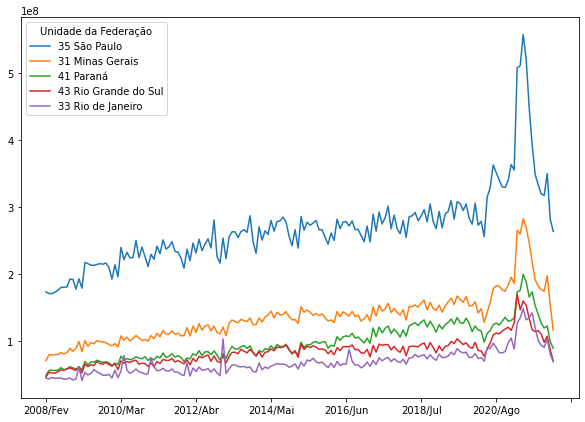

In [44]:
# And now we plot again without this high value.
# We can better see what information the graph gives us

sort_total.head().T.plot(figsize=(10, 7));

In [45]:
# We can do better! On the y axis we can change the values ​​to millions. 
# This will make our graph easier to read.

sort_total1 = sort_total / 1000000
sort_total1

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,173.18,170.69,170.45,172.57,175.63,179.65,180.20,180.28,192.16,191.62,...,520.28,448.01,391.60,348.45,333.55,319.49,317.20,350.03,282.14,263.64
31 Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.23,80.37,82.43,88.61,84.49,...,269.14,246.36,217.05,190.90,181.57,176.45,174.23,197.35,154.03,115.97
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,187.76,165.49,173.02,152.41,139.63,126.15,119.10,122.07,99.08,88.69
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,152.82,133.18,116.65,113.62,115.17,109.99,97.85,106.76,86.60,70.31
33 Rio de Janeiro,44.13,42.92,45.32,43.95,44.13,44.36,42.50,43.07,44.55,41.35,...,131.27,134.72,141.55,119.59,100.46,93.15,90.16,102.95,80.26,68.77
29 Bahia,33.41,41.34,42.83,42.11,39.91,57.66,43.25,42.85,43.33,40.95,...,124.78,110.98,97.13,87.44,89.20,87.96,86.73,88.58,62.11,37.46
26 Pernambuco,26.22,30.72,30.59,31.42,28.95,30.99,31.71,30.70,31.17,30.89,...,121.55,96.04,86.69,83.34,84.09,83.84,84.87,95.33,77.15,68.77
42 Santa Catarina,24.41,27.48,27.81,28.35,28.99,30.05,28.89,30.73,31.27,30.00,...,109.98,98.41,91.01,82.41,82.65,76.48,69.87,72.80,57.41,43.74
23 Ceará,27.64,30.09,31.38,31.19,29.46,30.30,29.30,30.44,31.74,30.42,...,85.95,69.31,59.19,56.55,56.58,56.26,56.58,56.42,43.94,37.52


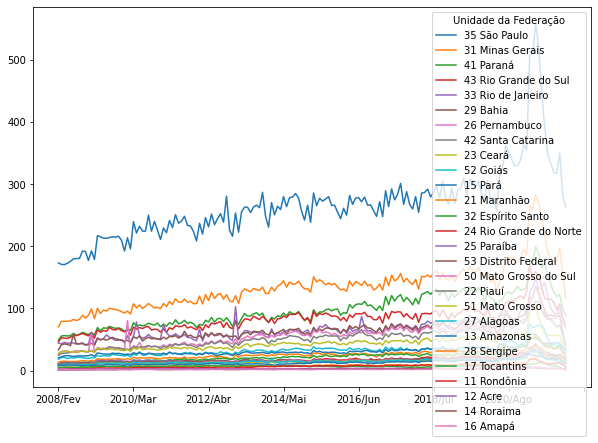

In [46]:
sort_total1.T.plot(figsize=(10,7));

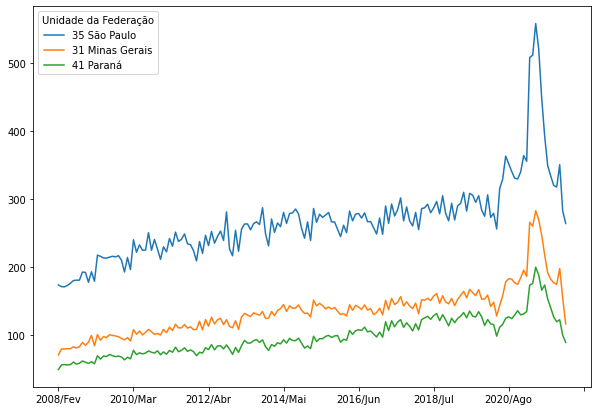

In [47]:
sort_total1.head(3).T.plot(figsize=(10, 7));

In [48]:
# let's see a smaller time range
sort_total1[sort_total1.columns[47:155]]

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,237.00,219.61,246.12,231.15,251.83,234.67,244.52,252.40,238.69,280.61,...,278.50,255.59,314.65,328.70,362.69,351.46,340.18,330.08,329.07,339.45
31 Minas Gerais,119.81,107.16,122.19,112.57,125.69,115.81,122.01,123.96,114.79,122.10,...,147.87,127.51,142.76,157.39,177.83,182.21,181.84,176.17,174.16,183.60
41 Paraná,74.22,72.97,80.91,78.14,85.40,77.80,83.52,83.84,79.19,84.99,...,114.79,97.88,111.05,115.30,124.15,126.40,123.63,129.02,135.28,129.22
43 Rio Grande do Sul,71.52,64.14,73.62,69.01,76.61,74.79,76.92,78.76,69.41,77.16,...,84.91,76.85,87.82,96.83,108.56,111.71,110.36,114.29,117.61,120.24
33 Rio de Janeiro,66.87,47.27,59.42,54.06,60.79,56.05,56.59,58.59,53.18,58.01,...,74.87,69.58,89.83,88.37,96.53,90.25,82.48,81.88,84.10,96.95
29 Bahia,56.24,51.30,60.63,56.05,60.52,56.24,59.43,59.22,54.81,56.00,...,71.07,60.15,66.57,78.88,91.27,86.26,78.33,83.34,83.11,87.67
26 Pernambuco,42.69,39.88,45.79,43.58,47.98,43.14,46.77,49.24,44.63,47.33,...,59.71,54.36,66.52,71.22,73.81,76.22,74.25,72.69,72.60,79.51
42 Santa Catarina,40.49,39.17,43.07,42.58,45.92,43.11,45.06,47.25,43.24,44.69,...,56.98,51.43,58.11,63.13,79.49,75.12,67.91,71.19,81.21,79.33
23 Ceará,36.10,32.14,36.33,37.74,38.66,35.66,35.93,37.31,34.85,36.96,...,46.72,44.98,59.18,57.24,58.51,55.16,54.40,55.62,56.48,55.33


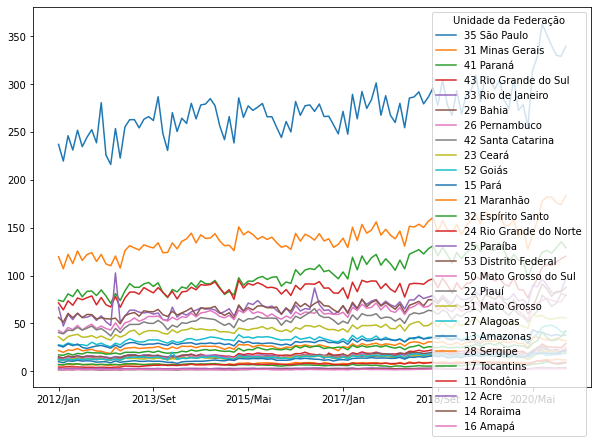

In [49]:
# Let´s plot this range

sort_total1[sort_total1.columns[47:155]].T.plot(figsize=(10, 7))

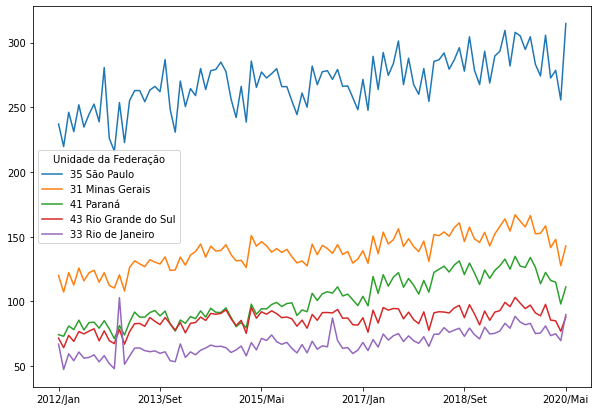

In [50]:
# Let's adjust this range until '2020/Mai'
# and now let's see the three states that spent the most on health
# note: the way you show the data in the graph may suggest a misperception of the information
# we can think that 'São Paulo' spent 5 times more money on health than 'Paraná'

filtered_months = sort_total1.columns[47:148]
sort_total1.head(5)[filtered_months].T.plot(figsize=(10, 7));

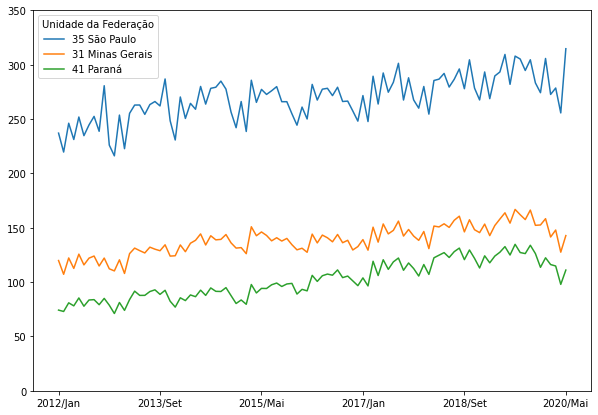

In [51]:
# Now let's make this graph show the information easier to see compared to reality
# note: we need to learn to read the graphs!!!

sort_total1.head(3)[filtered_months].T.plot(figsize=(10, 7))

plt.ylim(0, 350);

In [52]:
# let's get the most recent month in our dataframe.
# For this we can use 'list[-1]' for the last column

most_recent_month = sort_total1.columns[-1]
most_recent_month

'2022/Mar'

In [53]:
most_recent_expenses = sort_total_all_states[most_recent_month]
most_recent_expenses

Unidade da Federação
35 São Paulo             263637373.33
31 Minas Gerais          115965696.13
41 Paraná                 88685215.80
43 Rio Grande do Sul      70309355.99
33 Rio de Janeiro         68765991.31
29 Bahia                  37460272.11
26 Pernambuco             68771886.81
42 Santa Catarina         43741602.56
23 Ceará                  37524617.47
52 Goiás                  30251644.15
15 Pará                   33357407.81
21 Maranhão               22502888.05
32 Espírito Santo         27490593.88
24 Rio Grande do Norte    16044746.04
25 Paraíba                17495101.63
53 Distrito Federal       20169133.10
50 Mato Grosso do Sul     10183082.09
22 Piauí                  15572014.94
51 Mato Grosso            12807140.51
27 Alagoas                11684747.39
13 Amazonas               11391120.81
28 Sergipe                 5282718.36
17 Tocantins               1484737.42
11 Rondônia                5807201.82
12 Acre                    1001816.10
14 Roraima                 29

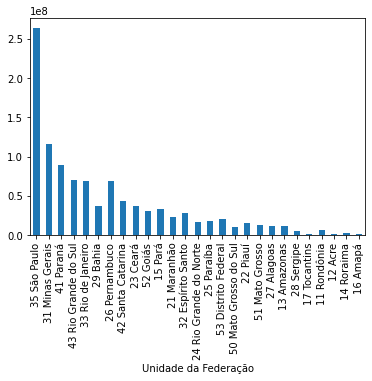

In [54]:
most_recent_expenses.plot(kind='bar')

In [55]:
# let's see the health expenditures of other states in relation to 'Rio de Janeiro'

compare_to_rio = most_recent_expenses / most_recent_expenses.loc['33 Rio de Janeiro']
compare_to_rio

Unidade da Federação
35 São Paulo             3.83
31 Minas Gerais          1.69
41 Paraná                1.29
43 Rio Grande do Sul     1.02
33 Rio de Janeiro        1.00
29 Bahia                 0.54
26 Pernambuco            1.00
42 Santa Catarina        0.64
23 Ceará                 0.55
52 Goiás                 0.44
15 Pará                  0.49
21 Maranhão              0.33
32 Espírito Santo        0.40
24 Rio Grande do Norte   0.23
25 Paraíba               0.25
53 Distrito Federal      0.29
50 Mato Grosso do Sul    0.15
22 Piauí                 0.23
51 Mato Grosso           0.19
27 Alagoas               0.17
13 Amazonas              0.17
28 Sergipe               0.08
17 Tocantins             0.02
11 Rondônia              0.08
12 Acre                  0.01
14 Roraima               0.04
16 Amapá                 0.01
Name: 2022/Mar, dtype: float64

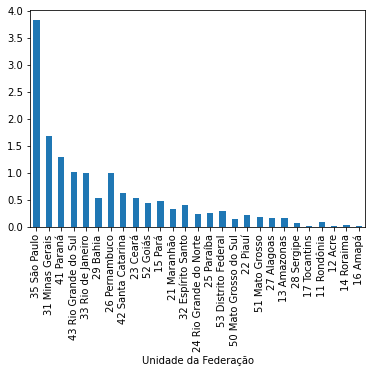

In [56]:
#Let´s plot and compare
# note: the comparison is being made using 'Rio de Janeiro' as a parameter

compare_to_rio.plot(kind='bar');

In [57]:
# we can use the total value of the country as a comparison parameter

proportional_expenses_by_state = most_recent_expenses / most_recent_expenses.sum()
proportional_expenses_by_state.sort_values(ascending=False, inplace=True)
proportional_expenses_by_state


Unidade da Federação
35 São Paulo             0.25
31 Minas Gerais          0.11
41 Paraná                0.09
43 Rio Grande do Sul     0.07
26 Pernambuco            0.07
33 Rio de Janeiro        0.07
42 Santa Catarina        0.04
23 Ceará                 0.04
29 Bahia                 0.04
15 Pará                  0.03
52 Goiás                 0.03
32 Espírito Santo        0.03
21 Maranhão              0.02
53 Distrito Federal      0.02
25 Paraíba               0.02
24 Rio Grande do Norte   0.02
22 Piauí                 0.01
51 Mato Grosso           0.01
27 Alagoas               0.01
13 Amazonas              0.01
50 Mato Grosso do Sul    0.01
11 Rondônia              0.01
28 Sergipe               0.01
14 Roraima               0.00
17 Tocantins             0.00
12 Acre                  0.00
16 Amapá                 0.00
Name: 2022/Mar, dtype: float64

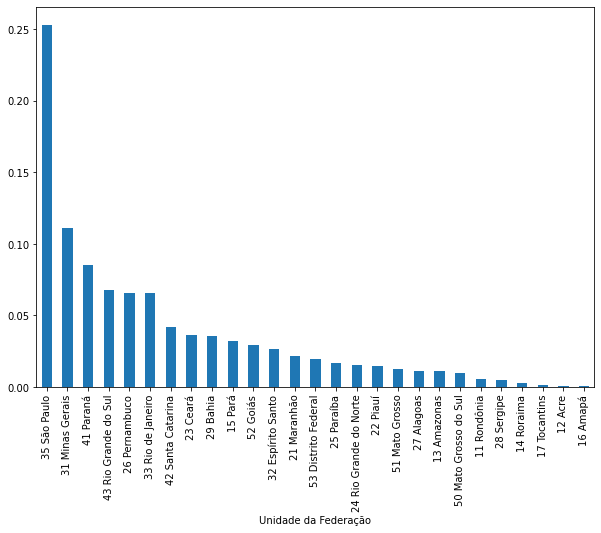

In [58]:
# Let´s plot proportional_expenses_by_state

proportional_expenses_by_state.plot(kind='bar', figsize=(10, 7));

In [59]:
#pip install xlrd=='1.2.0'

In [60]:
# Now, we gonna use a xls file from ibge who have data with estimate population in 2021
# note: we have a problem here. So we can get this data from another source


pd.read_excel('https://github.com/paulo-lins/EDA_datasus/blob/main/estimativa_dou_2021.xls?raw=true').head()


,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,213317639
2,Região Norte,NaN,18906962
3,Rondônia,NaN,1815278
4,Acre,NaN,906876


In [61]:
# We´ll get from "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o" the population data only with copy and paste
# note: this data is tab separated

population_data = """Posição	Unidade federativa	População (2010)[2]	População(2021)	% Mudança da pop. total	País comparável(habitantes)	
1	 São Paulo	41 262 199	46 649 132	+13.05%	21,9%	Espanha (46 439 864)
2	 Minas Gerais	19 597 330	21 411 923	+9.26%	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	15 989 929	17 463 349	+9.21%	8,2%	 Síria (17,500,658)
4	Bahia Bahia	14 016 906	14 985 284	+6.91%	7,1%	 Chade (14 037 000)
5	 Paraná	10 444 526	11 597 484	+11.04%	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	10 693 929	11 466 630	+7.23%	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	8 796 448	9 674 793	+9.98%	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	8 452 381	9 240 580	+9.32%	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	7 581 051	8 777 124	+15.78%	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	6 248 436	7 338 473	+17.44%	3,4%	 Sérvia (7 114 393)
11	 Goiás	6 003 788	7 206 589	+20.03%	3,4%	 Paraguai (7 003 406)
12	 Maranhão	6 574 789	7 153 262	+8.80%	3,4%	 Paraguai (7 003 406)
13	 Amazonas	3 483 985	4 269 995	+22.56%	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	3 514 952	4 108 508	+16.89%	1,9%	 Líbano (4 168 000)
15	 Paraíba	3 766 528	4 059 905	+7.79%	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 035 122	3 567 234	+17.53%	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 168 027	3 560 903	+12.40%	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 120 494	3 365 351	+7.85%	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 118 360	3 289 290	+5.48%	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	2 570 160	3 094 325	+20.39%	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 449 024	2 839 188	+15.93%	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 068 017	2 338 474	+13.07%	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 562 409	1 815 278	+16.18%	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 383 445	1 607 363	+16.18%	0,7%	 Bahrein (1 359 800)
25	 Acre	733 559	906 876	+23.63%	0,4%	 Fiji (859 178)
26	 Amapá	669 526	877 613	+31.08%	0,4%	 Fiji (859 178)
27	 Roraima	450 479	652 713	+44.89%	0,3%	 Luxemburgo (562 958)"""

In [62]:
# Using StringIO we can read the above data as a path of a file
from io import StringIO

population_data_IO = StringIO(population_data)
population_2021 = pd.read_csv(population_data_IO, sep='\t')
population_2021.head()

,Posição,Unidade federativa,População (2010)[2],População(2021),% Mudança da pop. total,País comparável(habitantes),Unnamed: 6
0,1,São Paulo,41 262 199,46 649 132,+13.05%,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,19 597 330,21 411 923,+9.26%,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,15 989 929,17 463 349,+9.21%,"8,2%","Síria (17,500,658)"
3,4,Bahia Bahia,14 016 906,14 985 284,+6.91%,"7,1%",Chade (14 037 000)
4,5,Paraná,10 444 526,11 597 484,+11.04%,"5,4%",Bolívia (11 410 651)


In [63]:
# Now we´ll need to use a pandas functions dropna, astype, display and maybe more!
# we need to check if the numeric data in our dataframe is really numbers
population_2021 = population_2021.dropna()
display(population_2021.head())
display(population_2021.info()) #note: população (population at 2021 and 2010) is an object! But we can change that!

,Posição,Unidade federativa,População (2010)[2],População(2021),% Mudança da pop. total,País comparável(habitantes),Unnamed: 6
0,1,São Paulo,41 262 199,46 649 132,+13.05%,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,19 597 330,21 411 923,+9.26%,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,15 989 929,17 463 349,+9.21%,"8,2%","Síria (17,500,658)"
3,4,Bahia Bahia,14 016 906,14 985 284,+6.91%,"7,1%",Chade (14 037 000)
4,5,Paraná,10 444 526,11 597 484,+11.04%,"5,4%",Bolívia (11 410 651)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Posição                      27 non-null     int64 
 1   Unidade federativa           27 non-null     object
 2   População (2010)[2]          27 non-null     object
 3   População(2021)              27 non-null     object
 4   % Mudança da pop. total      27 non-null     object
 5   País comparável(habitantes)  27 non-null     object
 6   Unnamed: 6                   27 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.7+ KB


None

In [65]:
# we need to check if the numeric data in our dataframe is really numbers
population_2021['População(2021)'].astype(int)

ValueError: ignored

In [66]:
# The above error tells us that 'Population(2021)' is not a number
# We can use a replace function from python to fix this
population_2021['População(2021)'] = population_2021['População(2021)'].str.replace(' ', '').astype(int) #note the str method before the replace function
population_2021.head()

,Posição,Unidade federativa,População (2010)[2],População(2021),% Mudança da pop. total,País comparável(habitantes),Unnamed: 6
0,1,São Paulo,41 262 199,46649132,+13.05%,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,19 597 330,21411923,+9.26%,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,15 989 929,17463349,+9.21%,"8,2%","Síria (17,500,658)"
3,4,Bahia Bahia,14 016 906,14985284,+6.91%,"7,1%",Chade (14 037 000)
4,5,Paraná,10 444 526,11597484,+11.04%,"5,4%",Bolívia (11 410 651)


In [67]:
# We´ll need only this columns: 'Unidade federativa' and 'População(2021)'. 
population_2021 = population_2021[['Unidade federativa', 'População(2021)']]
# As index we can use 'Unidade federativa	' (States)
population_2021 = population_2021.set_index('Unidade federativa')
population_2021.head()

,População(2021)
Unidade federativa,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


In [68]:
# let's gather the 'most_recent_expenses' that give us the expenses in March 2022
# and the 'population_2021'
# note: both the 'population_2021' dataframe and the 'most_recent_expenses' series
# has an index
most_recent_expenses.head()

Unidade da Federação
35 São Paulo           263637373.33
31 Minas Gerais        115965696.13
41 Paraná               88685215.80
43 Rio Grande do Sul    70309355.99
33 Rio de Janeiro       68765991.31
Name: 2022/Mar, dtype: float64

In [69]:
# Let's try using the join function...
population_2021.join(most_recent_expenses)

,População(2021),2022/Mar
Unidade federativa,,
São Paulo,46649132,NaN
Minas Gerais,21411923,NaN
Rio de Janeiro,17463349,NaN
Bahia Bahia,14985284,NaN
Paraná,11597484,NaN
Rio Grande do Sul,11466630,NaN
Pernambuco,9674793,NaN
Ceará,9240580,NaN
Pará Pará,8777124,NaN


In [70]:
# As we can see... It didn't work.
# We have some problems here... The series index is different from the dataframe index.
# Sometimes even a blank space causes this error. In this case, we found more than that.
# Some words are also duplicated as in 'Bahia Bahia'

# Using the strip function, whitespace before and after the word is deleted

population_2021.index = population_2021.index.str.strip()
population_2021.head()

,População(2021)
Unidade federativa,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


In [71]:
most_recent_expenses.index = most_recent_expenses.index.str[3:]


In [72]:
most_recent_expenses

Unidade da Federação
São Paulo             263637373.33
Minas Gerais          115965696.13
Paraná                 88685215.80
Rio Grande do Sul      70309355.99
Rio de Janeiro         68765991.31
Bahia                  37460272.11
Pernambuco             68771886.81
Santa Catarina         43741602.56
Ceará                  37524617.47
Goiás                  30251644.15
Pará                   33357407.81
Maranhão               22502888.05
Espírito Santo         27490593.88
Rio Grande do Norte    16044746.04
Paraíba                17495101.63
Distrito Federal       20169133.10
Mato Grosso do Sul     10183082.09
Piauí                  15572014.94
Mato Grosso            12807140.51
Alagoas                11684747.39
Amazonas               11391120.81
Sergipe                 5282718.36
Tocantins               1484737.42
Rondônia                5807201.82
Acre                    1001816.10
Roraima                 2938287.54
Amapá                    950756.63
Name: 2022/Mar, dtype: float64

In [73]:
population_2021.join(most_recent_expenses)

,População(2021),2022/Mar
Unidade federativa,,
São Paulo,46649132,263637373.33
Minas Gerais,21411923,115965696.13
Rio de Janeiro,17463349,68765991.31
Bahia Bahia,14985284,NaN
Paraná,11597484,88685215.80
Rio Grande do Sul,11466630,70309355.99
Pernambuco,9674793,68771886.81
Ceará,9240580,37524617.47
Pará Pará,8777124,NaN


In [74]:
# Looking at the dataframe above, we can see problems in two rows: 'Bahia Bahia' and 'Pará Pará'
# We can fix that using a simple code

for state in most_recent_expenses.index:
  #print(f"{state} {state} => {state}")
  population_2021.index = population_2021.index.str.replace(f"{state} {state}", state) 

In [75]:
population_2021.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='Unidade federativa')

In [76]:
spending_and_recent_population = population_2021.join(most_recent_expenses)
spending_and_recent_population['costs'] = spending_and_recent_population['2022/Mar'] / 1000000
spending_and_recent_population['cost_per_inhabitant'] = spending_and_recent_population['2022/Mar'] / spending_and_recent_population['População(2021)']
spending_and_recent_population

,População(2021),2022/Mar,costs,cost_per_inhabitant
Unidade federativa,,,,
São Paulo,46649132,263637373.33,263.64,5.65
Minas Gerais,21411923,115965696.13,115.97,5.42
Rio de Janeiro,17463349,68765991.31,68.77,3.94
Bahia,14985284,37460272.11,37.46,2.50
Paraná,11597484,88685215.80,88.69,7.65
Rio Grande do Sul,11466630,70309355.99,70.31,6.13
Pernambuco,9674793,68771886.81,68.77,7.11
Ceará,9240580,37524617.47,37.52,4.06
Pará,8777124,33357407.81,33.36,3.80


In [77]:
sort_total_all_states.index = sort_total_all_states.index.str[3:]


In [78]:
sort_total_all_states.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1062876666.11,173178487.49,170692267.36,170449727.03,172573621.67,...,520280167.19,448012733.49,391602214.93,348446858.66,333549250.99,319492072.08,317195469.00,350031956.62,282140976.72,263637373.33
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206687824.13,70301089.50,79119005.51,79046322.41,79268070.12,...,269136076.22,246357902.93,217052928.90,190903797.35,181571440.96,176449282.25,174231062.82,197349767.67,154029566.86,115965696.13
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,187763085.02,165485891.40,173023862.07,152412360.39,139634819.66,126148309.82,119099508.17,122074884.89,99076263.45,88685215.80
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,152818315.61,133175644.79,116646364.28,113620892.84,115169723.59,109993295.97,97845923.37,106760162.92,86604368.62,70309355.99
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,252841126.65,44128159.73,42916090.85,45324789.60,43951349.46,...,131270702.39,134724592.08,141551048.26,119585134.99,100460921.96,93154094.81,90159560.94,102949984.15,80256046.71,68765991.31


In [79]:
# let's rename the '2022/Mar' column 

spending_and_recent_population.drop(['2022/Mar', 'costs', 'cost_per_inhabitant'], axis=1)

,População(2021)
Unidade federativa,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia,14985284
Paraná,11597484
Rio Grande do Sul,11466630
Pernambuco,9674793
Ceará,9240580
Pará,8777124


In [80]:
def insert_costs_and_cost_per_inhabitant_for_2021(all_costs_by_month, data, month: str):
  #costs_by_month = all_costs_by_month[month]
  #data[f'costs_{month}'] = data[month]
  data[f'costs_{month}'] = all_costs_by_month[month]
  data[f'cost_per_inhabitant_{month}'] = all_costs_by_month[month] / data['População(2021)']

In [81]:
insert_costs_and_cost_per_inhabitant_for_2021(sort_total_all_states, spending_and_recent_population, '2021/Jul')


### Visualização, Seaborn e Proporcionalidades

In [82]:
spending_and_recent_population.head()

,População(2021),2022/Mar,costs,cost_per_inhabitant,costs_2021/Jul,cost_per_inhabitant_2021/Jul
Unidade federativa,,,,,,
São Paulo,46649132,263637373.33,263.64,5.65,448012733.49,9.60
Minas Gerais,21411923,115965696.13,115.97,5.42,246357902.93,11.51
Rio de Janeiro,17463349,68765991.31,68.77,3.94,134724592.08,7.71
Bahia,14985284,37460272.11,37.46,2.50,110978026.78,7.41
Paraná,11597484,88685215.80,88.69,7.65,165485891.40,14.27


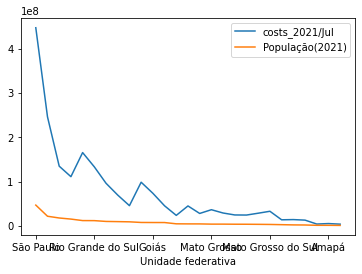

In [83]:
spending_and_recent_population[['costs_2021/Jul', 'População(2021)']].plot();

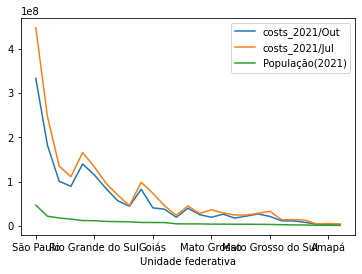

In [84]:
insert_costs_and_cost_per_inhabitant_for_2021(sort_total_all_states, spending_and_recent_population, '2021/Out')
spending_and_recent_population[['costs_2021/Out', 'costs_2021/Jul', 'População(2021)']].plot();

In [85]:
spending_and_recent_population_sort_by_cost_per_inhabitant = spending_and_recent_population.sort_values(by=['cost_per_inhabitant'])

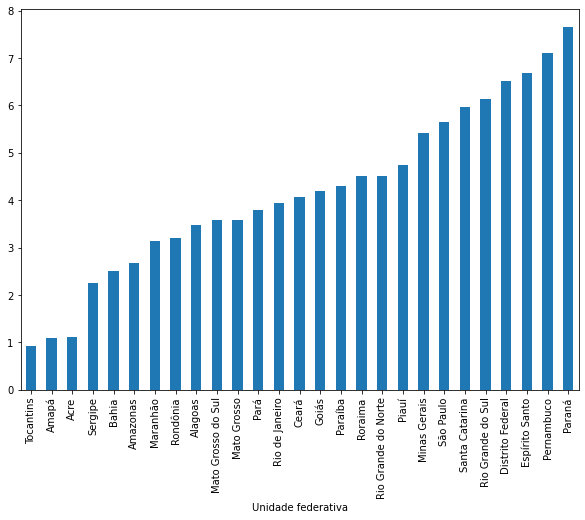

In [86]:
#here we´ll have a plot of 'cost_per_inhabitant for each state'
spending_and_recent_population_sort_by_cost_per_inhabitant['cost_per_inhabitant'].plot(kind='bar', figsize=(10,7));

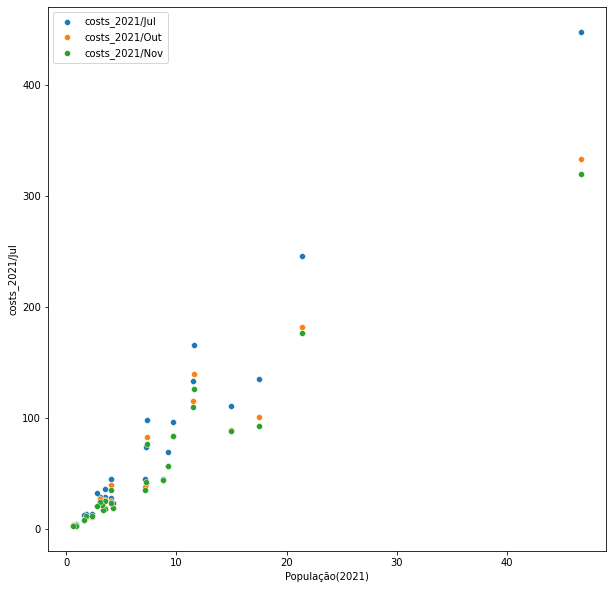

In [87]:
# now we use a seaborn library
# the chart below shows us that the larger the population of the state, the higher the costs
insert_costs_and_cost_per_inhabitant_for_2021(sort_total_all_states, spending_and_recent_population, '2021/Nov')
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.scatterplot(data=spending_and_recent_population / 1000000, x='População(2021)', y='costs_2021/Jul')
sns.scatterplot(data=spending_and_recent_population / 1000000, x='População(2021)', y='costs_2021/Out')
sns.scatterplot(data=spending_and_recent_population / 1000000, x='População(2021)', y='costs_2021/Nov')
plt.legend(labels=['costs_2021/Jul','costs_2021/Out', 'costs_2021/Nov']);

In [88]:
spending_and_recent_population.head()

,População(2021),2022/Mar,costs,cost_per_inhabitant,costs_2021/Jul,cost_per_inhabitant_2021/Jul,costs_2021/Out,cost_per_inhabitant_2021/Out,costs_2021/Nov,cost_per_inhabitant_2021/Nov
Unidade federativa,,,,,,,,,,
São Paulo,46649132,263637373.33,263.64,5.65,448012733.49,9.60,333549250.99,7.15,319492072.08,6.85
Minas Gerais,21411923,115965696.13,115.97,5.42,246357902.93,11.51,181571440.96,8.48,176449282.25,8.24
Rio de Janeiro,17463349,68765991.31,68.77,3.94,134724592.08,7.71,100460921.96,5.75,93154094.81,5.33
Bahia,14985284,37460272.11,37.46,2.50,110978026.78,7.41,89199342.02,5.95,87960897.77,5.87
Paraná,11597484,88685215.80,88.69,7.65,165485891.40,14.27,139634819.66,12.04,126148309.82,10.88


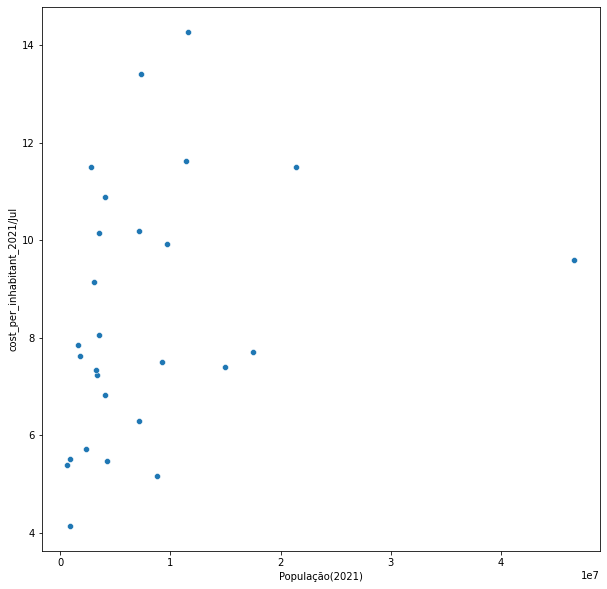

In [89]:
# now let's plot using the scatter plot for cost per inhabitant
# in this case we don't need to do a division by 10000000

plt.figure(figsize=(10, 10))
sns.scatterplot(data=spending_and_recent_population, x='População(2021)', y='cost_per_inhabitant_2021/Jul');

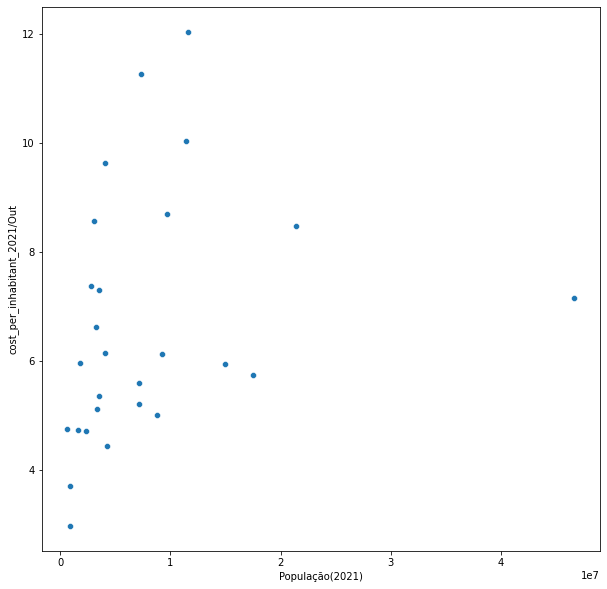

In [90]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=spending_and_recent_population, x='População(2021)', y='cost_per_inhabitant_2021/Out');

In [91]:
# looking at this scatter plot with the cost per inhabitant we can see that it is very difficult
# know if there is a function to describe it. Apparently there isn't.

In [92]:
sort_total1.index = sort_total1.index.str[3:]

In [93]:
sort_total1.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,173.18,170.69,170.45,172.57,175.63,179.65,180.20,180.28,192.16,191.62,...,520.28,448.01,391.60,348.45,333.55,319.49,317.20,350.03,282.14,263.64
Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.23,80.37,82.43,88.61,84.49,...,269.14,246.36,217.05,190.90,181.57,176.45,174.23,197.35,154.03,115.97
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,187.76,165.49,173.02,152.41,139.63,126.15,119.10,122.07,99.08,88.69
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,152.82,133.18,116.65,113.62,115.17,109.99,97.85,106.76,86.60,70.31
Rio de Janeiro,44.13,42.92,45.32,43.95,44.13,44.36,42.50,43.07,44.55,41.35,...,131.27,134.72,141.55,119.59,100.46,93.15,90.16,102.95,80.26,68.77


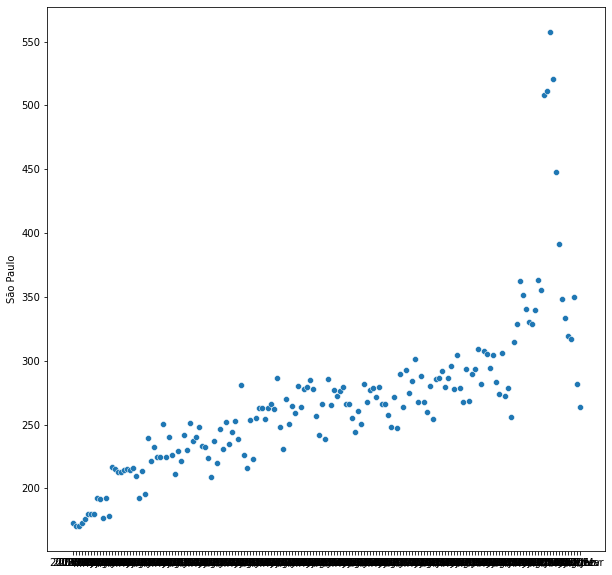

In [94]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=sort_total1.columns, y=sort_total1.loc['São Paulo'])
# We can do better than this!

In [95]:
# Using transpose 'T'
monthly = sort_total1.T
monthly

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,173.18,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,7.93,8.11,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.69,79.12,55.61,52.93,42.92,41.34,30.72,27.48,30.09,20.99,...,10.43,9.42,9.21,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.45,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,21.05,...,10.23,9.39,10.47,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.57,79.27,55.57,51.68,43.95,42.11,31.42,28.35,31.19,19.16,...,10.56,9.38,9.84,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.63,79.63,56.09,53.76,44.13,39.91,28.95,28.99,29.46,20.42,...,10.47,9.45,10.32,8.65,4.98,5.40,2.62,2.11,0.94,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Nov,319.49,176.45,126.15,109.99,93.15,87.96,83.84,76.48,56.26,42.03,...,21.40,17.91,17.05,18.61,11.17,8.25,11.68,3.70,3.00,2.50
2021/Dez,317.20,174.23,119.10,97.85,90.16,86.73,84.87,69.87,56.58,37.49,...,20.25,18.87,15.69,17.96,11.52,7.31,12.14,3.15,3.03,2.83
2022/Jan,350.03,197.35,122.07,106.76,102.95,88.58,95.33,72.80,56.42,41.69,...,20.96,23.56,14.52,19.18,11.96,4.99,12.25,2.93,3.29,2.99
2022/Fev,282.14,154.03,99.08,86.60,80.26,62.11,77.15,57.41,43.94,32.63,...,16.38,17.42,12.63,13.64,8.82,2.76,9.56,2.01,2.73,1.93


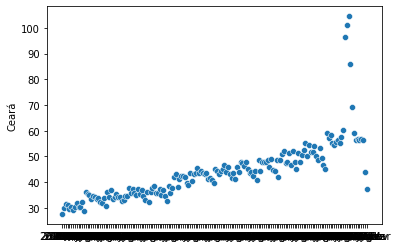

In [96]:
sns.scatterplot(data=monthly, x=monthly.index, y='Ceará')

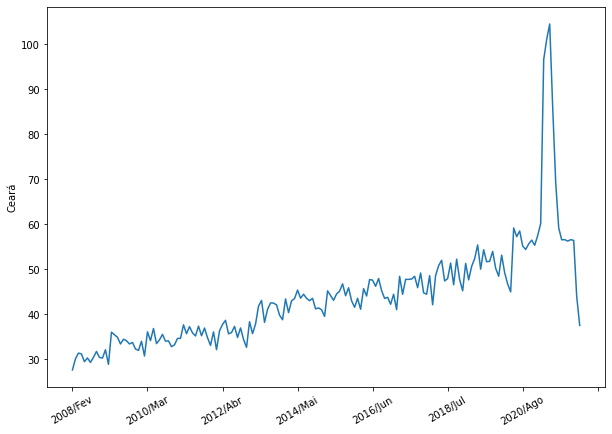

In [97]:
# We can make those text at the x axis more legible using 'ax.xaxis.set_major_locator(ticker.AutoLocator())'

plt.figure(figsize=(10,7))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Ceará')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
ax.xaxis.set_major_locator(ticker.AutoLocator());

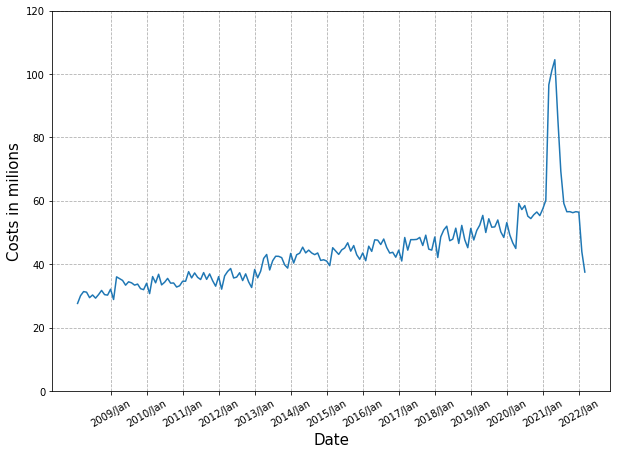

In [98]:
# for better visualization we can use the IndexLocator()
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Ceará')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 120)
plt.grid(True, linestyle='--')
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Costs in milions", fontsize = 15)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11));#using 'offset=11' we can see the january dates of the dataframe years

In [99]:
 # We need to change those dates for datetime format...
 # in this case we will to use date from datetime module
#note: the index of the 'monthly' dataframe is the year and month!

from datetime import date
monthly.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov',
       '2021/Dez', '2022/Jan', '2022/Fev', '2022/Mar'],
      dtype='object', length=170)

In [100]:
# Now let's make a function to change this index to a date
# To improve our function we can use a dictionary to represent the months

months = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}
def change_for_date(year_month: str):
  year: int = int(year_month[:4])
  month: str = year_month[5:]
  number_of_month: int = months[month]
  return date(year, number_of_month, 1)

monthly.index = monthly.index.map(change_for_date)

In [101]:
monthly.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,173.18,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,7.93,8.11,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.69,79.12,55.61,52.93,42.92,41.34,30.72,27.48,30.09,20.99,...,10.43,9.42,9.21,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.45,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,21.05,...,10.23,9.39,10.47,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.57,79.27,55.57,51.68,43.95,42.11,31.42,28.35,31.19,19.16,...,10.56,9.38,9.84,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.63,79.63,56.09,53.76,44.13,39.91,28.95,28.99,29.46,20.42,...,10.47,9.45,10.32,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Text(0, 0.5, 'Costs in milions')

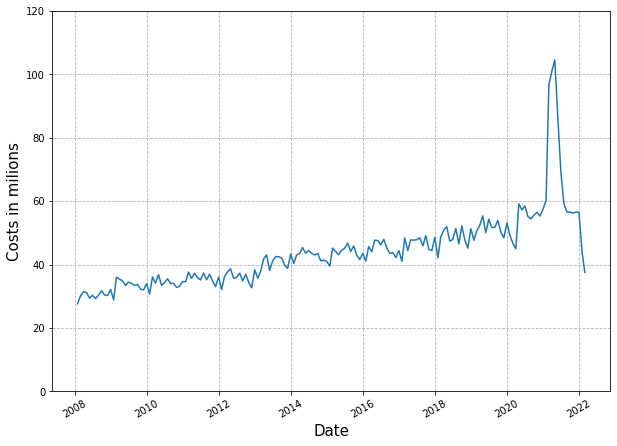

In [102]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Ceará')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 120)
plt.grid(True, linestyle='--')
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Costs in milions", fontsize = 15)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11));#using 'offset=11' we can see the january dates of the dataframe years

# **Using 'melt' to manipulate data**

In [103]:
monthly.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,173.18,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,7.93,8.11,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.69,79.12,55.61,52.93,42.92,41.34,30.72,27.48,30.09,20.99,...,10.43,9.42,9.21,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.45,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,21.05,...,10.23,9.39,10.47,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.57,79.27,55.57,51.68,43.95,42.11,31.42,28.35,31.19,19.16,...,10.56,9.38,9.84,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.63,79.63,56.09,53.76,44.13,39.91,28.95,28.99,29.46,20.42,...,10.47,9.45,10.32,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [104]:
# seaborn gets an 'x' and a 'y' axis. To make a graph of two or more states, 
# we need to make some changes to our dataframe
# first let's turn our index into a column

monthly.reset_index().head()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,173.18,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,...,9.71,7.93,8.11,7.93,4.64,5.05,1.94,1.74,0.77,1.28
1,2008-03-01,170.69,79.12,55.61,52.93,42.92,41.34,30.72,27.48,30.09,...,10.43,9.42,9.21,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2,2008-04-01,170.45,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,...,10.23,9.39,10.47,8.53,5.27,5.34,2.14,2.06,0.90,1.40
3,2008-05-01,172.57,79.27,55.57,51.68,43.95,42.11,31.42,28.35,31.19,...,10.56,9.38,9.84,9.08,5.37,5.34,2.28,2.23,1.03,1.41
4,2008-06-01,175.63,79.63,56.09,53.76,44.13,39.91,28.95,28.99,29.46,...,10.47,9.45,10.32,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [105]:
# when to use 'melt' identify the columns that will not be melted
monthly_melted = monthly.reset_index().melt(id_vars=['index'], value_vars=monthly.columns)
# change column names
monthly_melted.columns = ['year_month_day', 'state', 'cost']
# now we gona assign 'year_month_day' as datetime
monthly_melted['year_month_day'] = monthly_melted['year_month_day'].astype('datetime64')
monthly_melted

,year_month_day,state,cost
0,2008-02-01,São Paulo,173.18
1,2008-03-01,São Paulo,170.69
2,2008-04-01,São Paulo,170.45
3,2008-05-01,São Paulo,172.57
4,2008-06-01,São Paulo,175.63
...,...,...,...
4585,2021-11-01,Amapá,2.50
4586,2021-12-01,Amapá,2.83
4587,2022-01-01,Amapá,2.99
4588,2022-02-01,Amapá,1.93


In [106]:
monthly_melted['year_month_day'].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: year_month_day, dtype: datetime64[ns]

In [107]:
#df.loc[df['col1'].isin([value1, value2, value3, ...])]
# Now, we´ll reduce the number of states to improve our data visualization
filtered_state = monthly_melted.loc[monthly_melted['state'].isin(['São Paulo', 'Rio de Janeiro', 'Minas Gerais'])]
filtered_state

,year_month_day,state,cost
0,2008-02-01,São Paulo,173.18
1,2008-03-01,São Paulo,170.69
2,2008-04-01,São Paulo,170.45
3,2008-05-01,São Paulo,172.57
4,2008-06-01,São Paulo,175.63
...,...,...,...
845,2021-11-01,Rio de Janeiro,93.15
846,2021-12-01,Rio de Janeiro,90.16
847,2022-01-01,Rio de Janeiro,102.95
848,2022-02-01,Rio de Janeiro,80.26


Text(0, 0.5, 'Costs in milions')

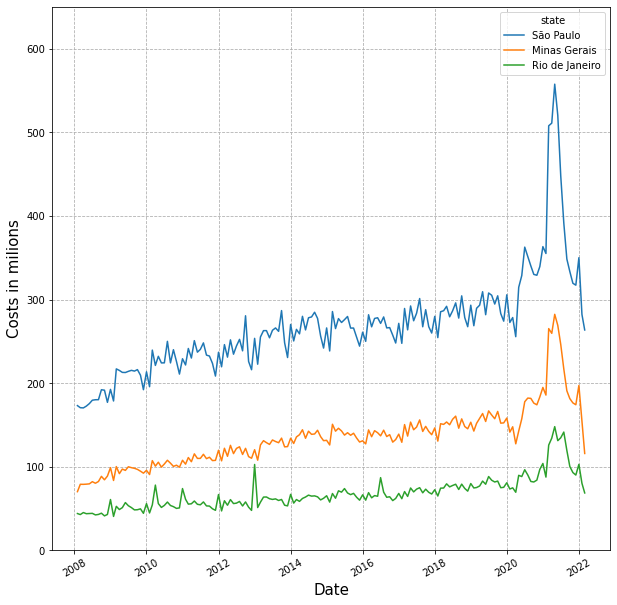

In [108]:
plt.figure(figsize=(10,10))

ax = sns.lineplot(data=filtered_state, x='year_month_day', y='cost', hue='state')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 650)
plt.grid(True, linestyle='--')
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Costs in milions", fontsize = 15)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11));#using 'offset=11' we can see the january dates of the dataframe years

In [109]:
monthly_melted['year_month_day']

0      2008-02-01
1      2008-03-01
2      2008-04-01
3      2008-05-01
4      2008-06-01
          ...    
4585   2021-11-01
4586   2021-12-01
4587   2022-01-01
4588   2022-02-01
4589   2022-03-01
Name: year_month_day, Length: 4590, dtype: datetime64[ns]

In [110]:
# now let's plot using just year, cost and month
# for that, we can create new columns
monthly_melted['year'] = monthly_melted['year_month_day'].dt.year
monthly_melted['month'] = monthly_melted['year_month_day'].dt.month

Text(0, 0.5, 'Costs in milions')

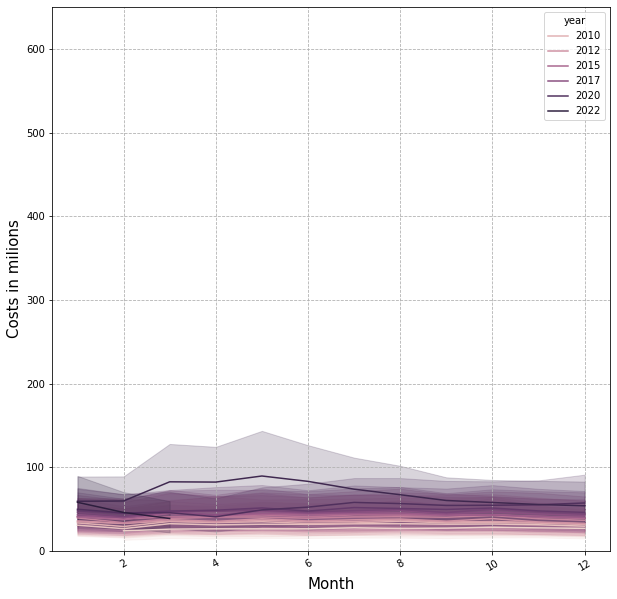

In [111]:

plt.figure(figsize=(10,10))

ax = sns.lineplot(data=monthly_melted, x='month', y='cost', hue='year')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 650)
plt.grid(True, linestyle='--')
ax.set_xlabel("Month", fontsize = 15)
ax.set_ylabel("Costs in milions", fontsize = 15)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11));#using 'offset=11' we can see the january dates of the dataframe years

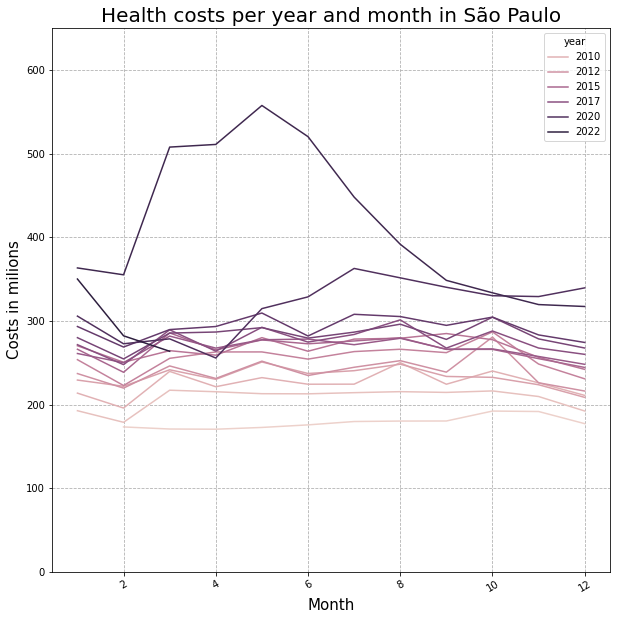

In [112]:
#Note: the graph above is very difficult to understand, let's just pick a state
#in this example we will choose 'São Paulo'
filtered_state = monthly_melted.query("state=='São Paulo'")

plt.figure(figsize=(10,10))
ax = sns.lineplot(data=filtered_state, x='month', y='cost', hue='year')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 650)
plt.grid(True, linestyle='--')
ax.set_title("Health costs per year and month in São Paulo", fontsize = 20)
ax.set_xlabel("Month", fontsize = 15)
ax.set_ylabel("Costs in milions", fontsize = 15);
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11));#using 'offset=11' we can see the january dates of the dataframe years

In [113]:
# Now we´ll create new columns 
# 1- a string with the name of month
# 2- days by month for each month

In [114]:
monthly_melted['month']

0        2
1        3
2        4
3        5
4        6
        ..
4585    11
4586    12
4587     1
4588     2
4589     3
Name: month, Length: 4590, dtype: int64

In [115]:
months_str = {
    1 :  'January',
    2 :  'February',
    3 :  'March',
    4 :  'April',
    5 :  'May',
    6 :  'June',
    7 :  'July',
    8 :  'August',
    9 :  'September',
    10 :  'October',
    11 :  'November',
    12 :  'December'
}

day_by_month = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [118]:
monthly_melted_test = monthly_melted

In [119]:
# we can use map to iterate with months_str dictionary
monthly_melted_test['month_str'] = monthly_melted_test['month'].map(months_str)
monthly_melted_test['day_by_month'] = monthly_melted_test['month'].map(day_by_month)
monthly_melted_test['costs_by_day'] = monthly_melted_test['cost'] / monthly_melted_test['day_by_month']

In [120]:
monthly_melted_test.head()

,year_month_day,state,cost,year,month,month_str,day_by_month,costs_by_day
0,2008-02-01,São Paulo,173.18,2008,2,February,28,6.18
1,2008-03-01,São Paulo,170.69,2008,3,March,31,5.51
2,2008-04-01,São Paulo,170.45,2008,4,April,30,5.68
3,2008-05-01,São Paulo,172.57,2008,5,May,31,5.57
4,2008-06-01,São Paulo,175.63,2008,6,June,30,5.85


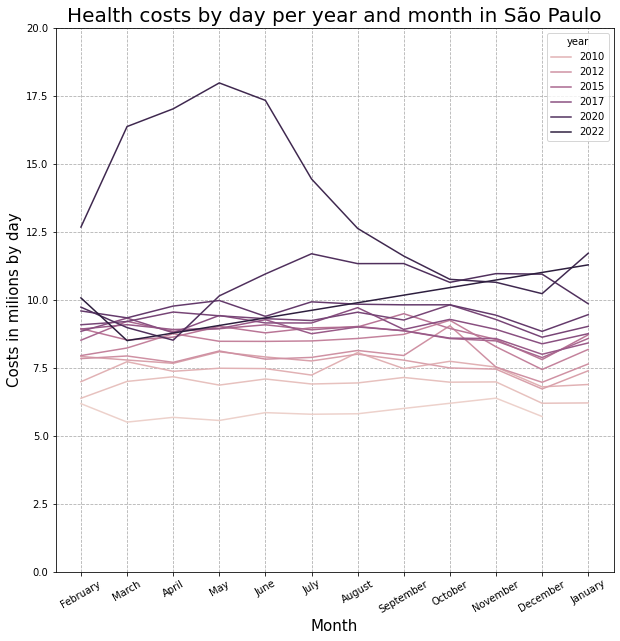

In [121]:
# now we´ll plot again using the months names and costs by day and change ylim
filtered_state = monthly_melted.query("state=='São Paulo'")

plt.figure(figsize=(10,10))
ax = sns.lineplot(data=filtered_state, x='month_str', y='costs_by_day', hue='year')
plt.xticks(rotation=30) #this will rotate the texts to 30 degrees
plt.ylim(0, 20)
plt.grid(True, linestyle='--')
ax.set_title("Health costs by day per year and month in São Paulo", fontsize = 20)
ax.set_xlabel("Month", fontsize = 15)
ax.set_ylabel("Costs in milions by day", fontsize = 15);
